# Explore here

In [2]:
# Your code here
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()
def db_connect():
    import os
    engine = create_engine(os.getenv('DATABASE_URL'))
    engine.connect()
    return engine

In [3]:
#EDA

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
total_data.shape #21 variables (columnas) y 41188 observaciones (filas)
total_data.info() #Todas las variables tienen el mismo número de observaciones
total_data.isnull().sum() #Ninguna variable tiene un valor nulo en el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No tiene sentido ver si los valores de las variables se repiten debido a que ninguna variable debería tener un único valor por cada observación. Por ejemplo, no existe ninguna variable que determine el id (siendo este único) o de la persona o de cualquier otra cosa.

In [5]:
#Excluir información (variables) irrelevantes
total_data.drop(["contact", "month", "day_of_week", "duration", "pdays"], axis=1, inplace=True)
#contact: el tipo de comunicación es irrelevante a la hora de analizar si va a contratar un depósito
#month y day_the_week:tanto el mes como el día de la semana que sea en el que se le haya contactado al cliente también
#duration y pdays: igual pasa con la duración y el númnero de días que han transcurrido desde la última campaña del contacto con el cliente
total_data.head()

,age,job,marital,education,default,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


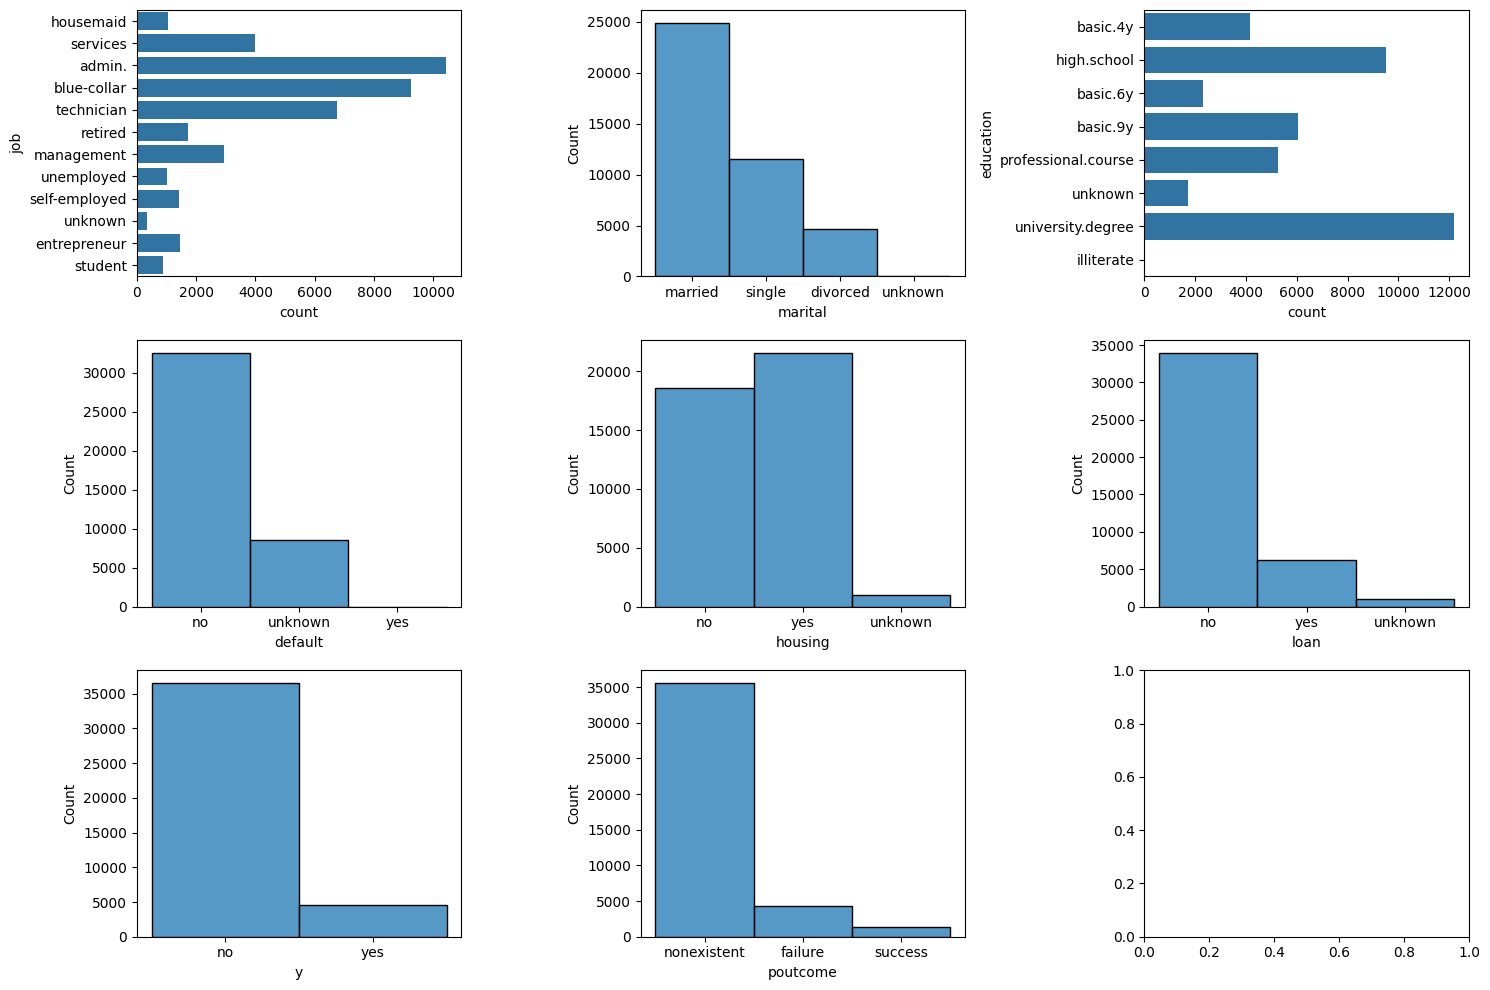

In [6]:
#Graficamos las variables más relevantes categóricas: job, marital, education, default, housing, loan

fig, axis = plt.subplots(3,3, figsize=(15,10))

sns.countplot(data=total_data["job"], ax=axis[0,0])
sns.histplot(data=total_data["marital"], ax=axis[0,1])
sns.countplot(data=total_data["education"], ax=axis[0,2])
sns.histplot(data=total_data["default"], ax=axis[1,0])
sns.histplot(data=total_data["housing"], ax=axis[1,1])
sns.histplot(data=total_data["loan"], ax=axis[1,2])
sns.histplot(data=total_data["y"], ax=axis[2,0])
sns.histplot(data=total_data["poutcome"], ax=axis[2,1])

plt.tight_layout()
plt.show()


Datos relevantes de las gráficas:
- Job: la mayoría de personas trabajan en algún area administrativa, seguidos de trabajadores "blue-collar" que hace referencia a aquellas personas que trabajan en puestos más         técnicos y básicos dentro del proceso de producción. Por el otro lado los estudiantes, cuidadores del hogar y desempleados son la minoría del dataset.
- Estado matrimonial: la maoría de personas están casadas, después solteras y por úlimo divorciados
- Educación: la mayoría de personas han logrado obtener un grado universitario seguido de aquellas personas que consiguieron superar highschool.
- Hipoteca: aunque hay más personas que han contratado un préstamo hipotecario, el número de personas que no lo han hecho no es muy inferior
- Préstamo personal: en este caso el número de personas que disponen de un préstamo personal son significativamente inferiores a aquellas que no han contratado ninguno
- TARGET: la gran mayoría de clientes no contratan un depósito a largo plazo
- Resultado campaña anterior: apenas se tienen datos, la gran mayoría son nonexistent por lo que podríamos decir que los clientes de esta base de datos son nuevos en su mayoría. No    consideramos esta variable para nuestro análisis

In [7]:
conteo_unkown1= total_data["default"].value_counts().get("yes", 0)
conteo_unkown2= total_data["default"].value_counts().get("no", 0)
conteo_unkown3= total_data["default"].value_counts().get("unknown", 0)
print(f"El número de veces que aparece yes en la variable default es: {conteo_unkown1}")
print(f"El número de veces que aparece no en la variable default es: {conteo_unkown2}")
print(f"El número de veces que aparece unknown en la variable default es: {conteo_unkown3}")


El número de veces que aparece yes en la variable default es: 3
El número de veces que aparece no en la variable default es: 32588
El número de veces que aparece unknown en la variable default es: 8597


La variable default no es nada relevante en el dataset porque es una respuesta binaria (sí o no) y solamente hay 3 yes en contraposición a 32588 no e incluso 8597 respuestas desconocidas

In [8]:
#Eliminamos default de la base de datos
total_data.drop(["default"], axis=1, inplace=True)
total_data.drop(["poutcome"], axis=1, inplace=True)

total_data.head()

,age,job,marital,education,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,1,0,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
#Valores unkown por variable
conteo_unknown = (total_data == "unknown").sum()
print(conteo_unknown)

age                  0
job                330
marital             80
education         1731
housing            990
loan               990
campaign             0
previous             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


Todas las variables con datos desconocidos son variables categóricas por lo que no podemos estimar una media adecuada (ya que no podemos aplicar ninguna media).
Voy a intentar rellenar aquellas personas por encima de la edad de jubilación y sustituir sus valores desconocidos por retired.

In [10]:
#Separamos

condicion = (total_data["age"] >= 65) & (total_data["job"] == "unknown")

total_data.loc[condicion, "job"] = "retired"
conteo_unknown = (total_data == "unknown").sum()
print(conteo_unknown) #Hemos logrado sustituir los valores unkown por retired correctamente para aquellas personas con 65 años o mas


age                  0
job                319
marital             80
education         1731
housing            990
loan               990
campaign             0
previous             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [11]:
#Calculo el valor máximo de cada variable para graficar
print(f"El valor máximo de campaign es de: {total_data['campaign'].max()}")
print(f"El valor máximo de previous es de: {total_data['previous'].max()}")
print(f"El valor máximo de emp.var.rate es de: {total_data['emp.var.rate'].max()}")
print(f"El valor mínimo de emp.var.rate es de: {total_data['emp.var.rate'].min()}")
print(f"El valor máximo de cons.price.idx es de: {total_data['cons.price.idx'].max()}")
print(f"El valor mínimo de cons.price.idx es de: {total_data['cons.price.idx'].min()}")
print(f"El valor máximo de cons.conf.idx es de: {total_data['cons.conf.idx'].max()}")
print(f"El valor máximo de euribor3m es de: {total_data['euribor3m'].max()}")
print(f"El valor máximo de nr.employed es de: {total_data['nr.employed'].max()}")
print(f"El valor mínimo de nr.employed es de: {total_data['nr.employed'].min()}")


El valor máximo de campaign es de: 56
El valor máximo de previous es de: 7
El valor máximo de emp.var.rate es de: 1.4
El valor mínimo de emp.var.rate es de: -3.4
El valor máximo de cons.price.idx es de: 94.767
El valor mínimo de cons.price.idx es de: 92.201
El valor máximo de cons.conf.idx es de: -26.9
El valor máximo de euribor3m es de: 5.045
El valor máximo de nr.employed es de: 5228.1
El valor mínimo de nr.employed es de: 4963.6


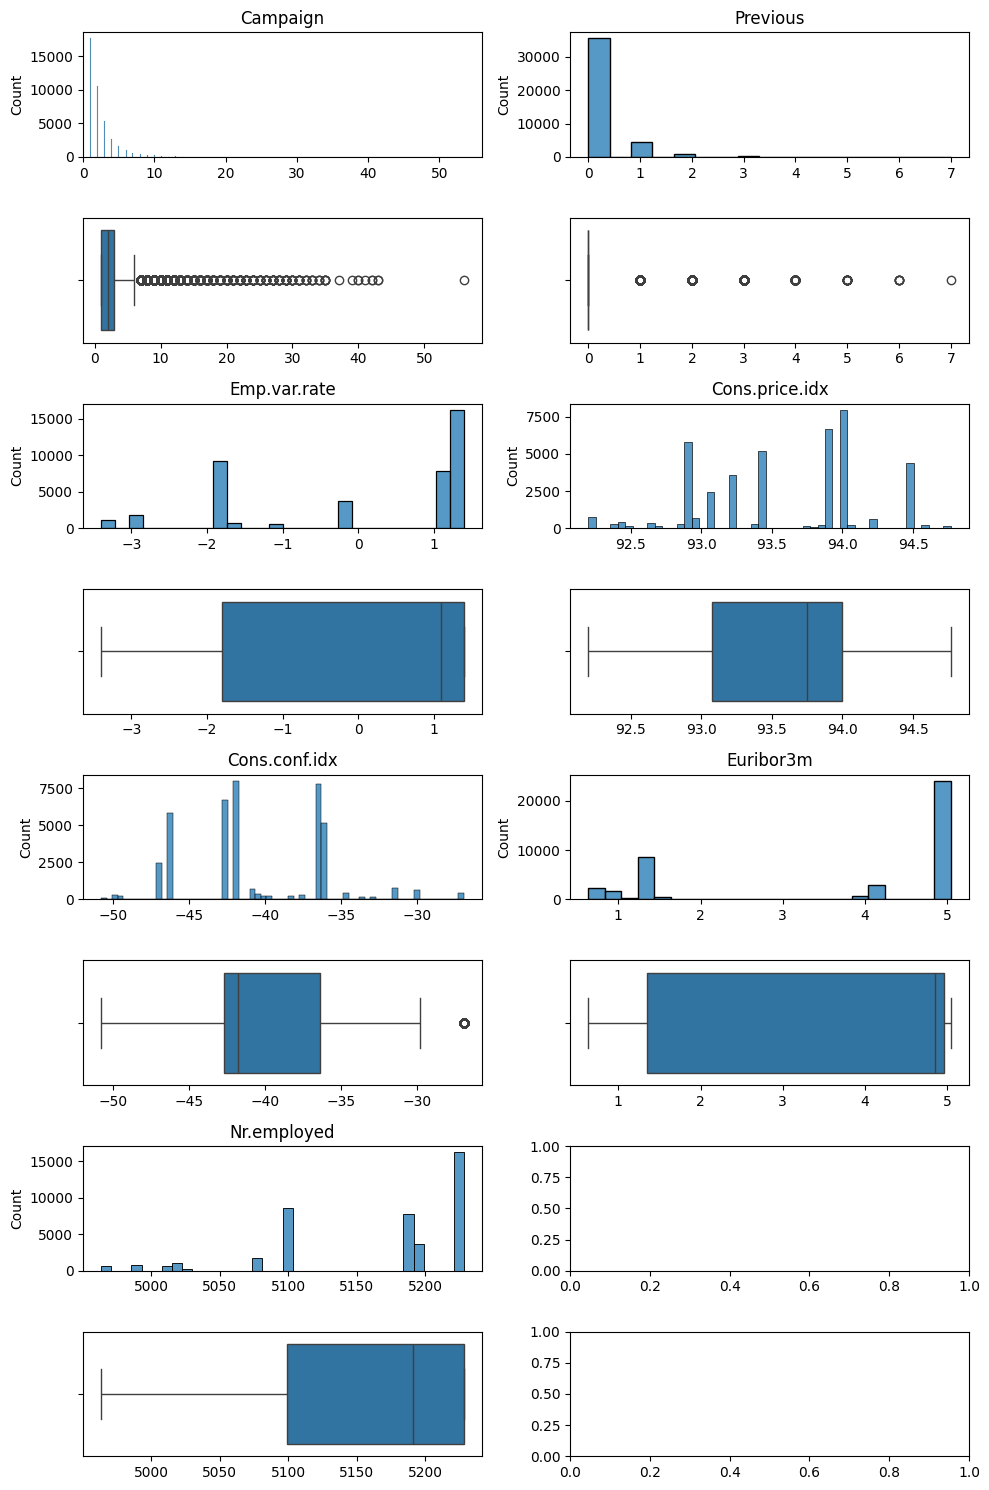

In [12]:
#Análisis sobre variables numéricas: campaign, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

fig, axis = plt.subplots(8,2, figsize=(10,15))
#campaign
sns.histplot(ax = axis[0,0], data=total_data, x="campaign").set(xlabel=None)
axis[0,0].set_xlim(0,56)
axis[0,0].set_title("Campaign")
sns.boxplot(ax = axis[1,0], data=total_data, x="campaign").set(xlabel=None)

#previous
sns.histplot(ax = axis[0,1], data=total_data, x="previous").set(xlabel=None)
axis[0,1].set_title("Previous")
sns.boxplot(ax = axis[1,1], data=total_data, x="previous").set(xlabel=None)

#emp.var.rate
sns.histplot(ax = axis[2,0], data=total_data, x="emp.var.rate").set(xlabel=None)
axis[2,0].set_title("Emp.var.rate")
sns.boxplot(ax = axis[3,0], data=total_data, x="emp.var.rate").set(xlabel=None)

#cons.price.idx
sns.histplot(ax = axis[2,1], data=total_data, x="cons.price.idx").set(xlabel=None)
axis[2,1].set_title("Cons.price.idx")
sns.boxplot(ax = axis[3,1], data=total_data, x="cons.price.idx").set(xlabel=None)

#cons.conf.idx
sns.histplot(ax = axis[4,0], data=total_data, x="cons.conf.idx").set(xlabel=None)
axis[4,0].set_title("Cons.conf.idx")
sns.boxplot(ax = axis[5,0], data=total_data, x="cons.conf.idx").set(xlabel=None)

#cons.conf.idx
sns.histplot(ax = axis[4,1], data=total_data, x="euribor3m").set(xlabel=None)
axis[4,1].set_title("Euribor3m")
sns.boxplot(ax = axis[5,1], data=total_data, x="euribor3m").set(xlabel=None)

#nr.employed
sns.histplot(ax = axis[6,0], data=total_data, x="nr.employed").set(xlabel=None)
axis[6,0].set_title("Nr.employed")
sns.boxplot(ax = axis[7,0], data=total_data, x="nr.employed").set(xlabel=None)



plt.tight_layout()
plt.show()

Por lo general las variables no disponen de muchos outliers menos las variables: previous y campaign. Esto se puede deber a que la gente no ha solido ser contactado a diferencia de otras personas que lo han sido mucho y, por el otro lado, que la gente no fue contactada en la campaña anterior. Seguramente debido a que las personas de la anterior y esta nueva campaña sean distintas (porque la gran mayoría de personas no fueron contactadas la anterior campaña).
En definitiva, los outliers no van a ser un problema debido a que al haber cambiado de perfil de clientes probablemente no nos sirvan mucho los datos de las campañas anteriores

ANÁLISIS DE VARIABLES MULTIVARIANTE

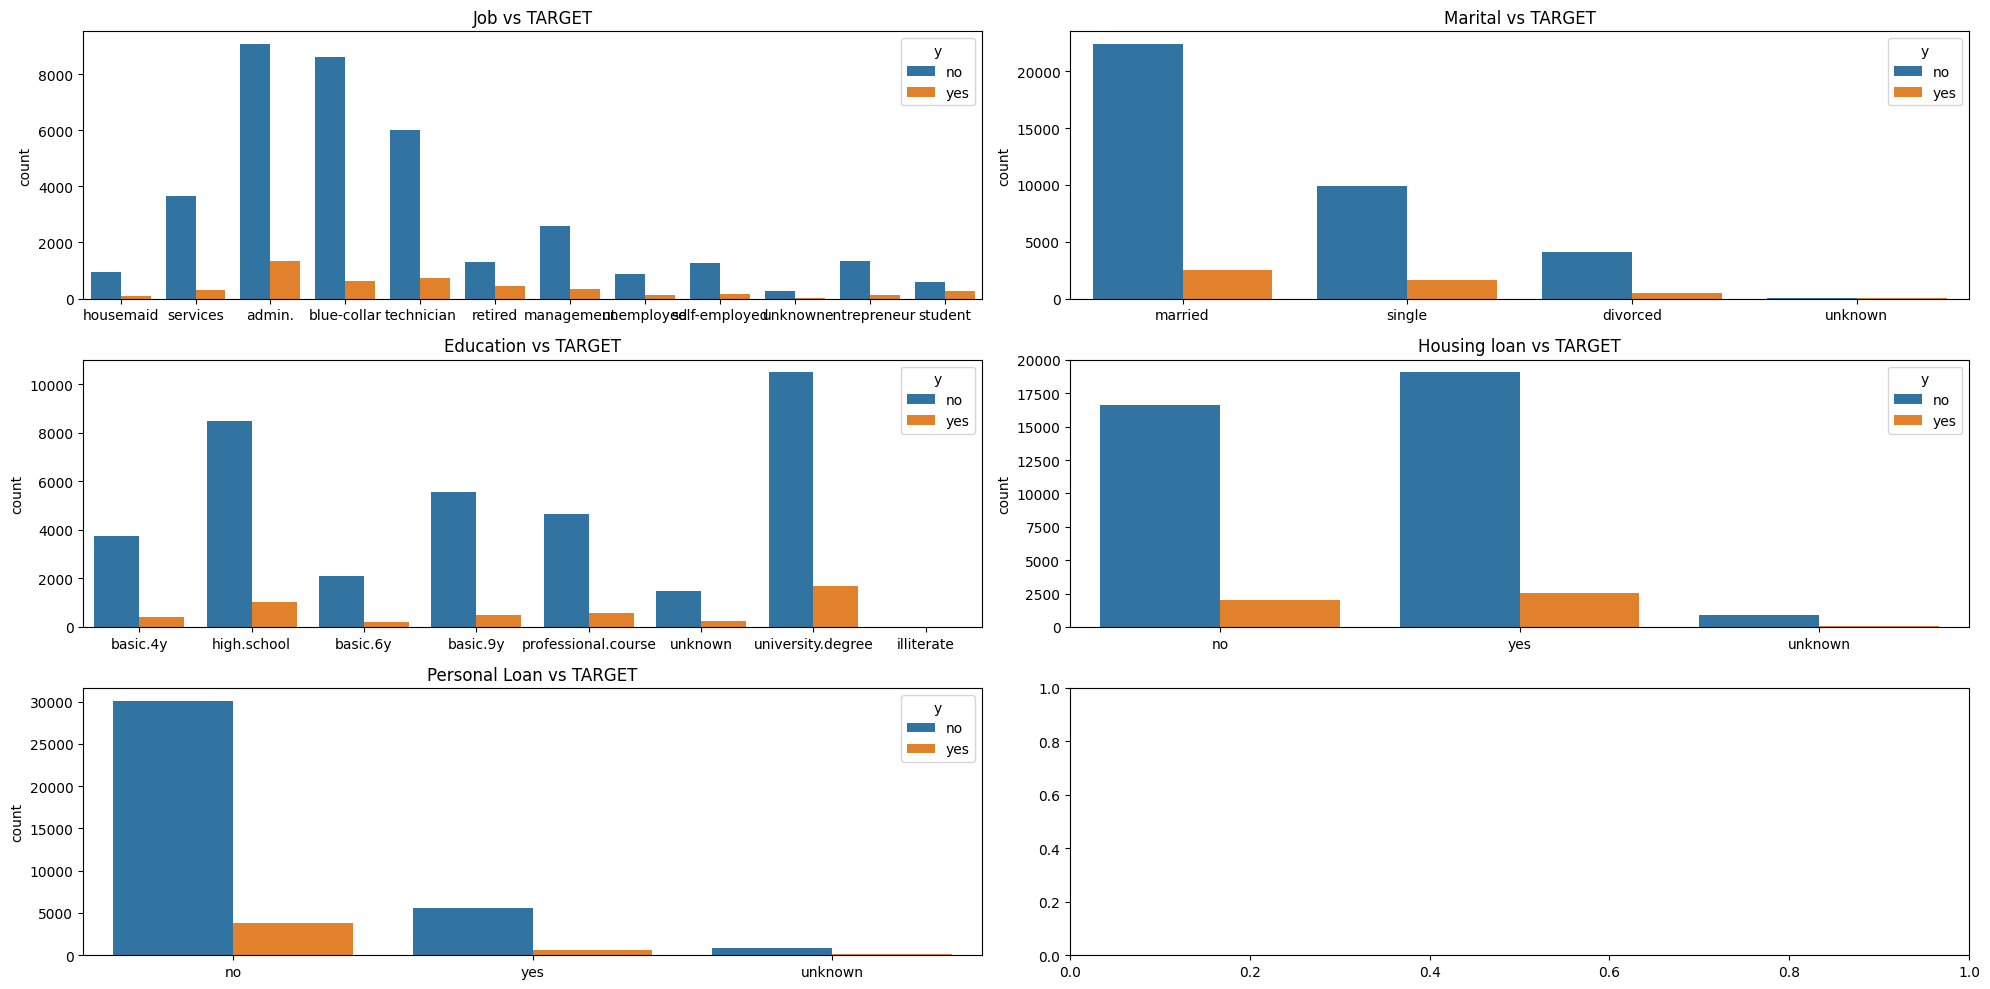

In [13]:
#Análisis categórico-categórico
fig, axis = plt.subplots(3,2, figsize=(20,10))

sns.countplot(ax= axis[0,0], data=total_data, x="job", hue="y").set(xlabel=None)
axis[0,0].set_title("Job vs TARGET")
sns.countplot(ax= axis[0,1], data=total_data, x="marital", hue="y").set(xlabel=None)
axis[0,1].set_title("Marital vs TARGET")
sns.countplot(ax= axis[1,0], data=total_data, x="education", hue="y").set(xlabel=None)
axis[1,0].set_title("Education vs TARGET")
sns.countplot(ax= axis[1,1], data=total_data, x="housing", hue="y").set(xlabel=None)
axis[1,1].set_title("Housing loan vs TARGET")
sns.countplot(ax= axis[2,0], data=total_data, x="loan", hue="y").set(xlabel=None)
axis[2,0].set_title("Personal Loan vs TARGET")


plt.tight_layout()
plt.show()

Vemos que por lo general la gente con mayor nivel de estudios, mejores trabajos, casados, con hipotecas y sin préstamos personales, son los que más aceptan los depósitos a largo plazo. Es decir, personas que tienen mayor seguridad econonómica o que se encuentran más asentados (la incertidumbre de una persona joven y sin pareja es mayor a una casada y con más edad).

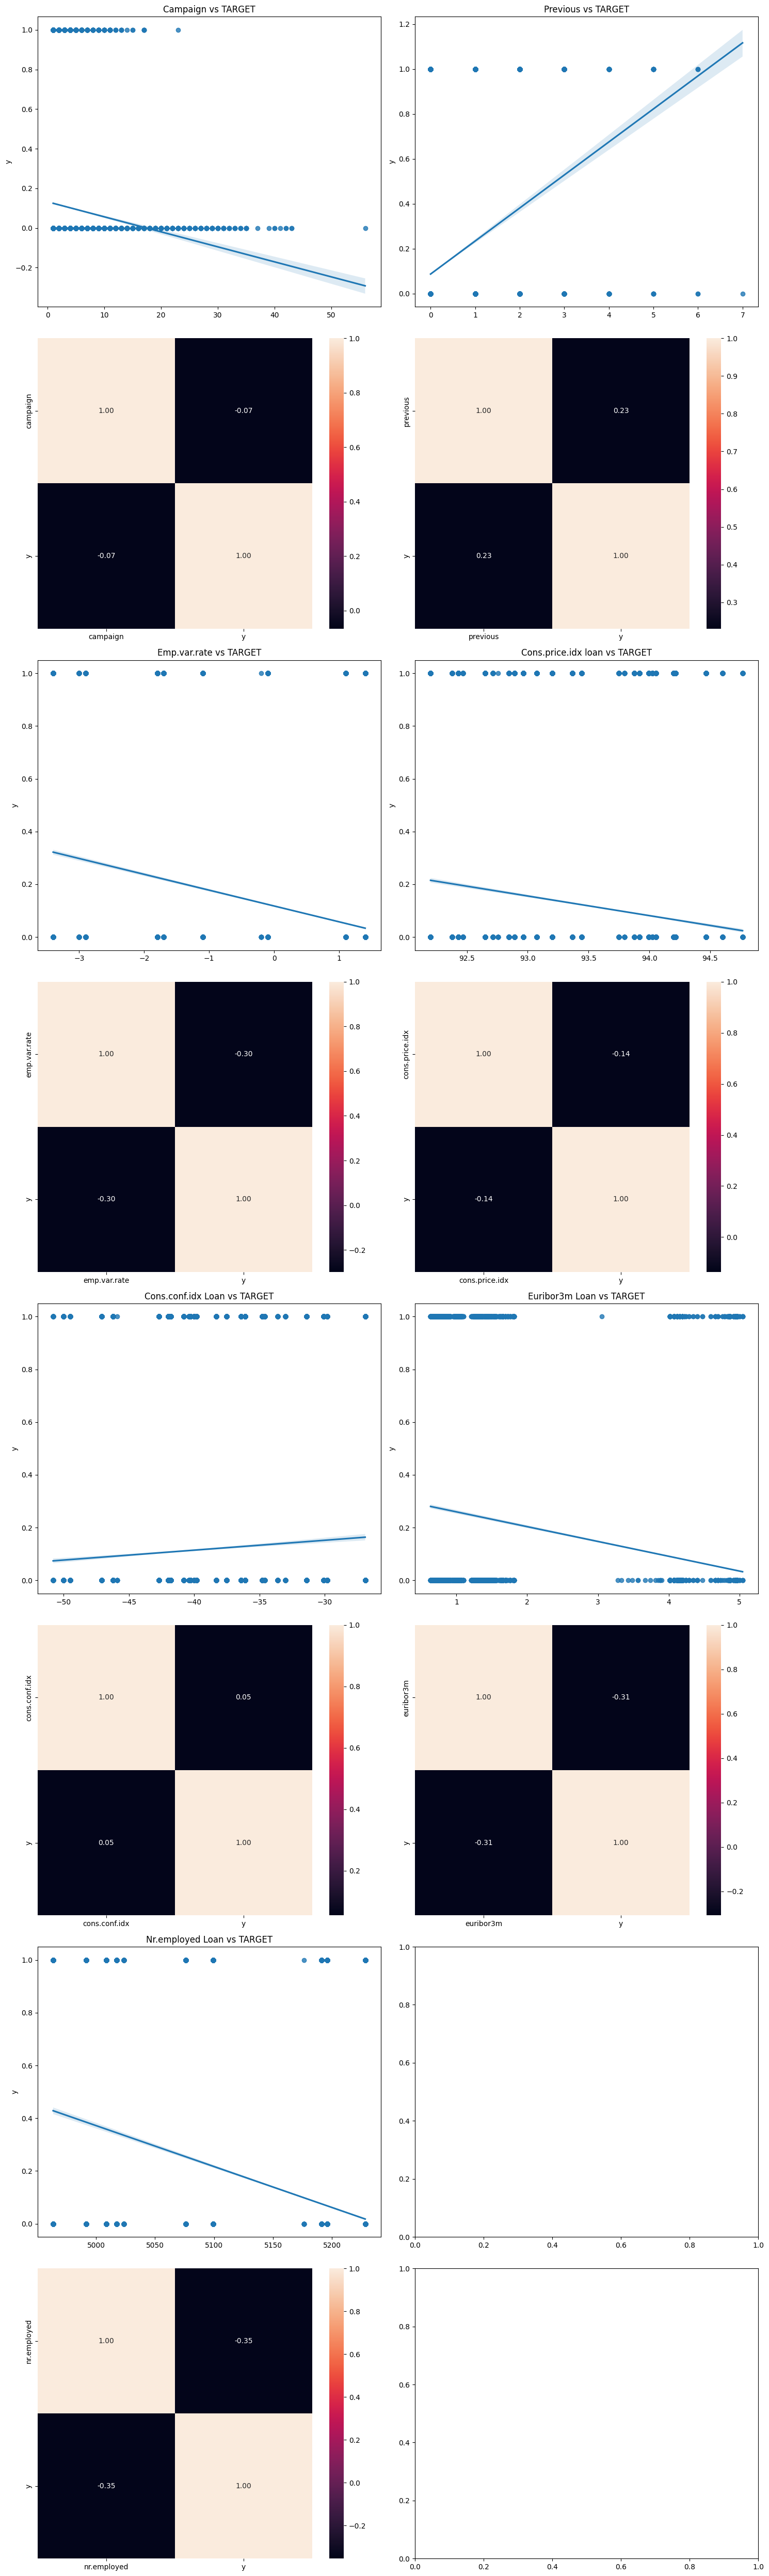

In [19]:
#Análisis numérico-numérico: campaign, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

fig, axis = plt.subplots(8,2, figsize=(15,50))

#Convertir y a numerico
total_data["y"]=pd.factorize(total_data["y"])[0]

#campaign
sns.regplot(ax= axis[0,0], data=total_data, x="campaign", y="y").set(xlabel=None)
axis[0,0].set_title("Campaign vs TARGET")
sns.heatmap(total_data[["campaign","y"]].corr(), annot=True, fmt=".2f", ax=axis[1,0])

#previous
sns.regplot(ax= axis[0,1], data=total_data, x="previous", y="y").set(xlabel=None)
axis[0,1].set_title("Previous vs TARGET")
sns.heatmap(total_data[["previous","y"]].corr(), annot=True, fmt=".2f", ax=axis[1,1])

#emp.var.rate
sns.regplot(ax= axis[2,0], data=total_data, x="emp.var.rate", y="y").set(xlabel=None)
axis[2,0].set_title("Emp.var.rate vs TARGET")
sns.heatmap(total_data[["emp.var.rate","y"]].corr(), annot=True, fmt=".2f", ax=axis[3,0])

#cons.price.idx
sns.regplot(ax= axis[2,1], data=total_data, x="cons.price.idx", y="y").set(xlabel=None)
axis[2,1].set_title("Cons.price.idx loan vs TARGET")
sns.heatmap(total_data[["cons.price.idx","y"]].corr(), annot=True, fmt=".2f", ax=axis[3,1])

#cons.conf.idx
sns.regplot(ax= axis[4,0], data=total_data, x="cons.conf.idx", y="y").set(xlabel=None)
axis[4,0].set_title("Cons.conf.idx Loan vs TARGET")
sns.heatmap(total_data[["cons.conf.idx","y"]].corr(), annot=True, fmt=".2f", ax=axis[5,0])

#euribor3m
sns.regplot(ax= axis[4,1], data=total_data, x="euribor3m", y="y").set(xlabel=None)
axis[4,1].set_title("Euribor3m Loan vs TARGET")
sns.heatmap(total_data[["euribor3m","y"]].corr(), annot=True, fmt=".2f", ax=axis[5,1])

#nr.employed
sns.regplot(ax= axis[6,0], data=total_data, x="nr.employed", y="y").set(xlabel=None)
axis[6,0].set_title("Nr.employed Loan vs TARGET")
sns.heatmap(total_data[["nr.employed","y"]].corr(), annot=True, fmt=".2f", ax=axis[7,0])

plt.tight_layout()
plt.show()


En general las variables que más correlación tienen con que una persona haya contratado un depósito a largo plazo son las variables de la tasa de variación del empleo, el índice del euribor y el número de empleados. Todas estas relaciones, aunque no sean muy signficativas, son negativas. Cuanto mayor sea el valor de alguna de estas variables menos probable es que contrate una persona un depósito a largo plazo.

In [20]:
#Análisis numérico-categórico
#Factorizar variables categóricas en numéricas
total_data["job"]=pd.factorize(total_data["job"])[0]
total_data["marital"]=pd.factorize(total_data["marital"])[0]
total_data["education"]=pd.factorize(total_data["education"])[0]
total_data["housing"]=pd.factorize(total_data["housing"])[0]
total_data["loan"]=pd.factorize(total_data["loan"])[0]

<Axes: >

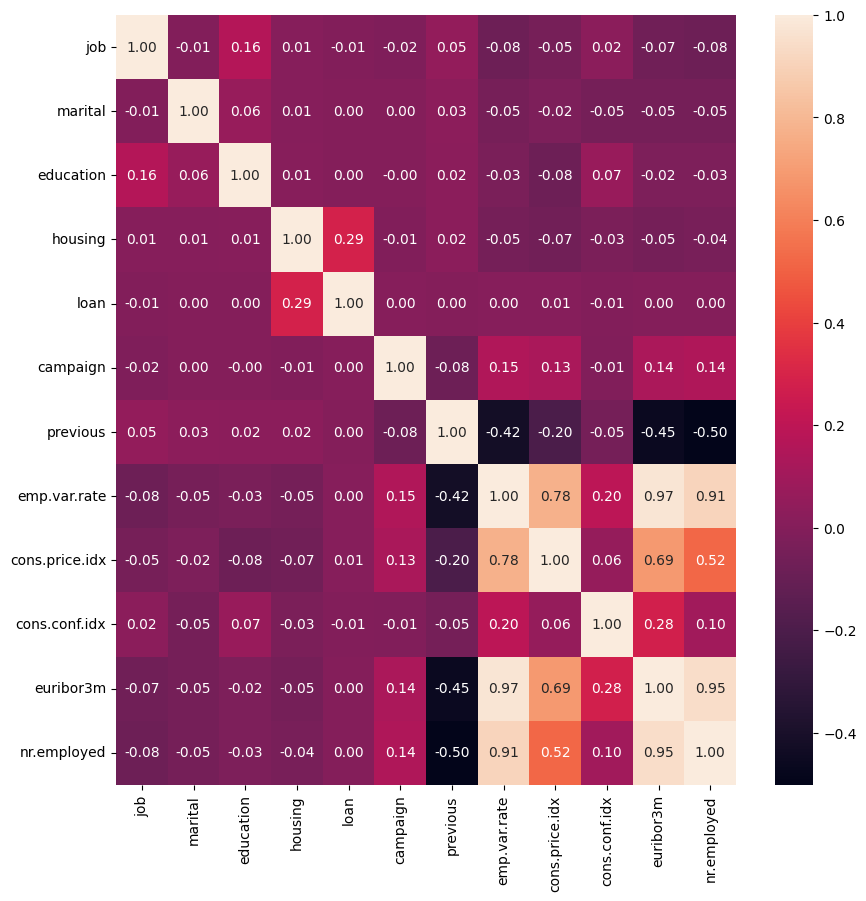

In [22]:
#Análisis
fig, axis = plt.subplots(figsize=(10,10))
sns.heatmap(total_data[["job", "marital", "education", "housing", "loan", "campaign", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]].corr(), annot=True, fmt=".2f")

Las variables con un gran grado de correlacion son:
- Número de empleados con tasa del variación de empleo (0,91): cuanto mayor es la tasa de variación del empleo mayor es el número de personas contratadas
- Euribor con tasa de variación del empleo (0,97): cuanto mayor es el euribor mayor es la tasa de variación del empleo
- Euribor y número de empleados (0,95): misma lógica que en los anteriores casos
Existen otras correlacione sigualmente elevadas entre variables pero todas se leen igual. Si es un valor positivo es que la relación es negativa, y al contrario si el valor de la correlación es negativo

OUTLIERS
Como he comentado previamente pretendo mantener los outliers ya que son pocos y considero que pueden favorecer el análisis ya que pueden marcar unos mayores resultados a la hora de contratar depósitos a largo plazos.

ESCALADO DE VALORES

In [27]:
from sklearn.model_selection import train_test_split

num_variables = ["previous", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "job", "marital", "education", "housing", "loan"]

X = total_data.drop("y", axis=1)[num_variables]
y = total_data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job,marital,education,housing,loan
12556,0,1.4,93.918,4.960,5228.1,3,0,3,1,0
35451,0,-1.8,92.893,1.244,5099.1,2,0,6,0,0
30592,1,-1.8,92.893,1.354,5099.1,5,0,0,0,0
17914,0,1.4,93.918,4.961,5228.1,0,2,3,1,0
3315,0,1.1,93.994,4.860,5191.0,2,1,1,0,0


In [28]:
#Escalado Mínimo-Máximo
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job,marital,education,housing,loan
12556,0.000000,1.000000,0.669135,0.980730,1.000000,0.272727,0.000000,0.428571,0.5,0.0
35451,0.000000,0.333333,0.269680,0.138291,0.512287,0.181818,0.000000,0.857143,0.0,0.0
30592,0.142857,0.333333,0.269680,0.163228,0.512287,0.454545,0.000000,0.000000,0.0,0.0
17914,0.000000,1.000000,0.669135,0.980957,1.000000,0.000000,0.666667,0.428571,0.5,0.0
3315,0.000000,0.937500,0.698753,0.958059,0.859735,0.181818,0.333333,0.142857,0.0,0.0


In [29]:
#Inicialización y entrenamiento del modelo:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(8238,))

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8889293517844137

Vemos que el test de precisión se acerca mucho al 0,90 por lo que podemos considerar que el modelo de predicción que hemos creado es bastante acertado

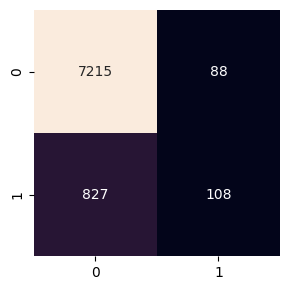

In [34]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix

depo_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(depo_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Total de casos 8238

- Verdaderos positivos: vemos como existen 7215 (87,58%) de verdaderos positivos
- Verdaderos negativos: vemos como existen 108 (1,31%) de verdaderos negativos
- Falsos positivos: vemos como existen 827 (10,03%) de falsos positivos
- Falsos negativos: vemos como existen 88 (1,06%) de falsos negativos

En general la suma de verdaderos positivos y verdaderos negativos equivale a que en el 88.89% de los casos el modelo acierta. Y son mayores los casos de falsos positivos que de falsos negativos.